In [13]:
import numpy as np
from numpy import fft
import math
import cv2
import matplotlib.pyplot as plt

In [4]:
img = cv2.imread('lena.jpg')
#图像灰度转换
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#获取图像高度和宽度
height = grayImage.shape[0]
width = grayImage.shape[1]

In [5]:
# 仿真运动模糊
def motion_process(image_size, motion_angle):
    PSF = np.zeros(image_size)
    print(image_size)
    center_position = (image_size[0] - 1) / 2
    print(center_position)

    slope_tan = math.tan(motion_angle * math.pi / 180)
    slope_cot = 1 / slope_tan
    if slope_tan <= 1:
        for i in range(15):
            offset = round(i * slope_tan)  
            PSF[int(center_position + offset), int(center_position - offset)] = 1
        return PSF / PSF.sum()             # 对点扩散函数进行归一化亮度
    else:
        for i in range(15):
            offset = round(i * slope_cot)
            PSF[int(center_position - offset), int(center_position + offset)] = 1
        return PSF / PSF.sum()

In [6]:
# 对图片进行运动模糊
def make_blurred(input, PSF, eps):
    input_fft = fft.fft2(input)             # 傅里叶变换
    PSF_fft = fft.fft2(PSF) + eps
    blurred = fft.ifft2(input_fft * PSF_fft)
    blurred = np.abs(fft.fftshift(blurred))
    return blurred

In [7]:
def wiener(input, PSF, eps, K):        
    input_fft = fft.fft2(input)
    PSF_fft = fft.fft2(PSF) + eps
    PSF_fft_1 = np.conj(PSF_fft) / (np.abs(PSF_fft) ** 2 + K)
    result = fft.ifft2(input_fft * PSF_fft_1)
    result = np.abs(fft.fftshift(result))
    return result

In [11]:
# 进行运动模糊处理
PSF = motion_process((height,width), 60) 
blurred = np.abs(make_blurred(grayImage, PSF, 1e-3))
# 添加噪声
blurred_noisy=blurred + 0.1 * blurred.std() *np.random.standard_normal(blurred.shape)

(256, 256)
127.5


### 信噪比未知

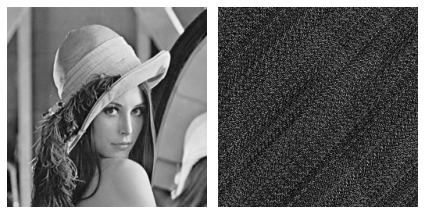

In [14]:
result = wiener(blurred_noisy,PSF,0,K=0)
plt.figure(figsize=(6, 8))
plt.subplot(121), plt.imshow(grayImage, 'gray'), plt.axis('off')
plt.subplot(122), plt.imshow(result, 'gray'), plt.axis('off')
plt.tight_layout()
plt.show()

### 信噪比已知

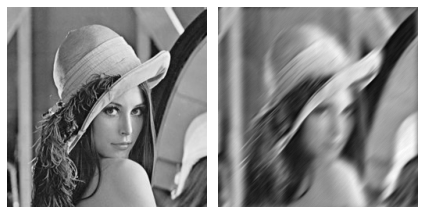

In [21]:
result = wiener(blurred_noisy,PSF,0.1+1e-3,K=3)
plt.figure(figsize=(6, 8))
plt.subplot(121), plt.imshow(grayImage, 'gray'), plt.axis('off')
plt.subplot(122), plt.imshow(result, 'gray'), plt.axis('off')
plt.tight_layout()
plt.show()

### 信噪比自适应

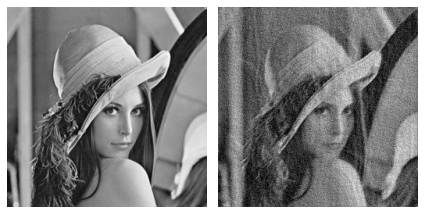

In [17]:
result=wiener(blurred_noisy,PSF,0.1+1e-3,K=0.01) 
plt.figure(figsize=(6, 8))
plt.subplot(121), plt.imshow(grayImage, 'gray'), plt.axis('off')
plt.subplot(122), plt.imshow(result, 'gray'), plt.axis('off')
plt.tight_layout()
plt.show()